In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ast import literal_eval
import matplotlib.patches as patches
from pydicom import dcmread, read_file
import skimage as sk
import cv2

In [11]:
todas = pd.read_csv("/media/deadwolf/BEC4-9B89/chext14/Todas.csv")
etiquetadas=pd.read_csv("/media/deadwolf/BEC4-9B89/chext14/bboxes.csv")

In [3]:
n=len(todas['rutas'])
print('Total de imagenes: ',n)

Total de imagenes:  112120


In [4]:
m=len(etiquetadas['id'])
print('Total de imagenes etiquetadas: ',m)

Total de imagenes etiquetadas:  1106


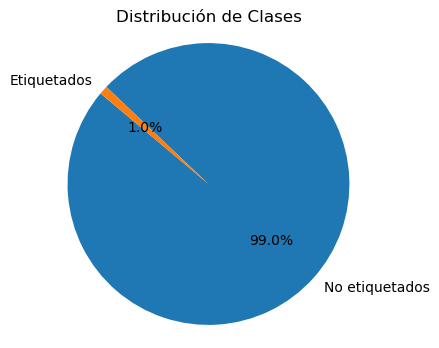

In [5]:
plt.figure(figsize=(4,4))  
# Crear la gráfica de pastel
plt.pie([n-m,m], labels=['No etiquetados','Etiquetados'], autopct='%1.1f%%', startangle=140)
plt.title('Distribución de Clases')
plt.axis('equal')
#plt.savefig('distribucion_etiquetados_Xray14.png', bbox_inches='tight')
plt.show()

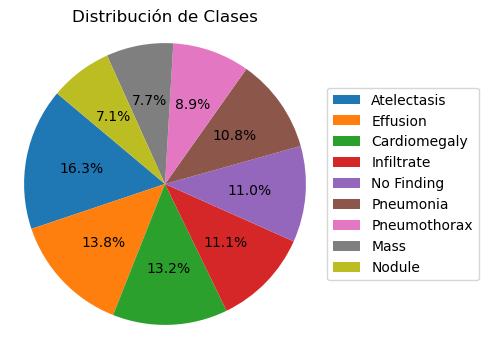

[Text(-0.589557481413223, 0.11145391922089277, '16.3%'), Text(-0.4352962959998461, -0.41293720429238917, '13.8%'), Text(0.02252933659500491, -0.599576874964828, '13.2%'), Text(0.4311036946444203, -0.41731235838869, '11.1%'), Text(0.598392290659535, -0.04389380912195307, '11.0%'), Text(0.49034805294160866, 0.3457727389144108, '10.8%'), Text(0.19861421787075687, 0.5661734649907106, '8.9%'), Text(-0.10884786988636838, 0.5900441858210284, '7.7%'), Text(-0.36228266378733404, 0.4782794910082947, '7.1%')]


In [6]:
# Calcular el recuento de clases
clase_counts = etiquetadas['label'].value_counts()

# Obtener las etiquetas y los recuentos como listas separadas
etiquetas = clase_counts.index.tolist()  # Obtener las etiquetas de las clases
recuentos = clase_counts.tolist()  # Obtener los recuentos de las clases

plt.figure(figsize=(4,4))  
# Crear la gráfica de pastel con las etiquetas y los recuentos
pat, texts, _ = plt.pie(recuentos, labels=None, autopct='%1.1f%%', startangle=140)

# Crear la leyenda con las etiquetas y colores correspondientes
plt.legend(pat, etiquetas, loc="center left", fontsize=10, bbox_to_anchor=(1,0.5))

plt.title('Distribución de Clases')
plt.axis('equal')
#plt.savefig('distribucion_clasesd_Xray14.png', bbox_inches='tight')
plt.show()
print(_)

In [7]:
print(recuentos)

[180, 153, 146, 123, 122, 120, 98, 85, 79]


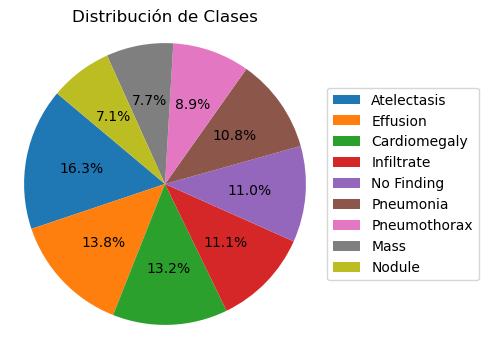

In [8]:
# Calcular el recuento de clases
clase_counts = etiquetadas['label'].value_counts()

# Obtener las etiquetas y los recuentos como listas separadas
etiquetas = clase_counts.index.tolist()  # Obtener las etiquetas de las clases
recuentos = clase_counts.tolist()  # Obtener los recuentos de las clases

plt.figure(figsize=(4,4))  
# Crear la gráfica de pastel con las etiquetas y los recuentos
pat, texts, _ = plt.pie(recuentos, labels=None, autopct='%1.1f%%', startangle=140)

# Crear la leyenda con las etiquetas y colores correspondientes
plt.legend(pat, etiquetas, loc="center left", fontsize=10, bbox_to_anchor=(1,0.5))

plt.title('Distribución de Clases')
plt.axis('equal')
#plt.savefig('distribucion_clasesb_Xray14.png', bbox_inches='tight')
plt.show()

(1024, 1024)


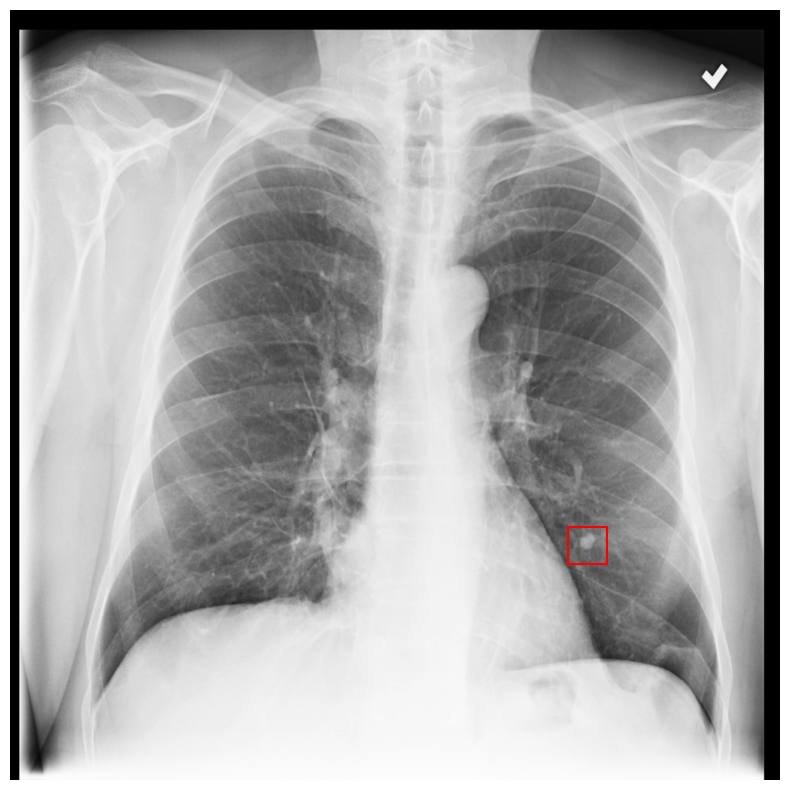

In [8]:
#Visualizando bboxes
ruta='/home/deadwolf/Descargas/Nodule/00023078_000.png'
bboxes=[[741.180952380952,687.001058201058,52.0126984126984,48.7619047619048]]
imagen=sk.io.imread(ruta)
print(imagen.shape)
fig, ax = plt.subplots(figsize=(10,10), facecolor='w', edgecolor='b')
ax.imshow(imagen,cmap="gray")
ax.axis('off')

for bbox in bboxes:
    bb=bbox
    rect = patches.Rectangle((bb[0],bb[1]),bb[2],bb[3], linewidth=1.5, edgecolor='r', facecolor='none')
    ax.add_patch(rect)
    
#plt.savefig('/home/deadwolf/Descargas/Nodulo14.png', bbox_inches='tight', pad_inches=0) 


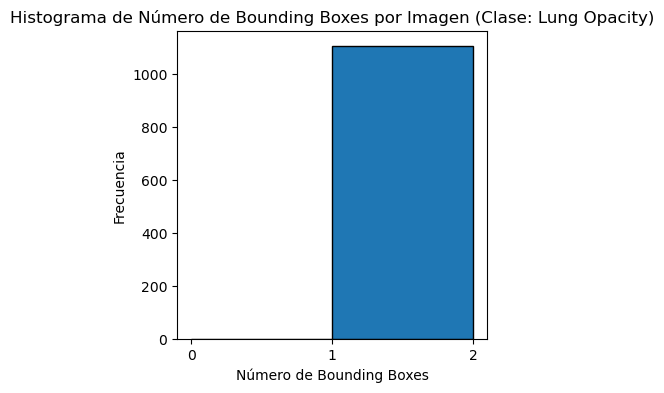

In [7]:
#generemos un histograma de la cantidad de bboxes presentes en las imagenes 
etiquetadas['long'] = etiquetadas['bboxes'].apply(lambda x: len(eval(x)))
plt.figure(figsize=(4,4))
plt.hist(etiquetadas['long'], bins=range(min(etiquetadas['long']-1), max(etiquetadas['long'])+2), edgecolor='black')
plt.xlabel('Número de Bounding Boxes')
plt.ylabel('Frecuencia')
plt.title('Histograma de Número de Bounding Boxes por Imagen (Clase: Lung Opacity)')
plt.xticks(range(min(etiquetadas['long']-1), max(etiquetadas['long'])+2))
plt.grid(False)
#plt.savefig('bboxesn_Xray14.png', bbox_inches='tight')
plt.show()

In [12]:
#Calculando el porcentaje que representa cada recuadro respecto a la imagen
area_total=1024*1024
porcentajes=[]
opacities= etiquetadas[etiquetadas['label'] != 'No Finding']
for bboxes in opacities['bboxes']:
    bbs=literal_eval(bboxes)
    for bb in bbs:
        area_bb=bb[2]*bb[3]
        porcent=int(round((area_bb/area_total)*100,0))
        porcentajes.append(porcent)  

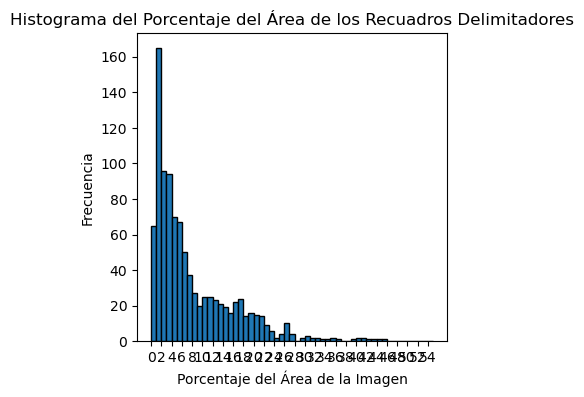

In [19]:
#Histograma de porcentajes de recuadros
plt.figure(figsize=(4,4))
plt.hist(porcentajes, bins=range(min(porcentajes),max(porcentajes)), edgecolor='black')
plt.xticks(range(min(porcentajes), max(porcentajes), 2))
plt.xlabel('Porcentaje del Área de la Imagen')
plt.ylabel('Frecuencia')
plt.title('Histograma del Porcentaje del Área de los Recuadros Delimitadores')
plt.grid(False)
#plt.savefig('porcen_Xray14.png', bbox_inches='tight')
plt.show()

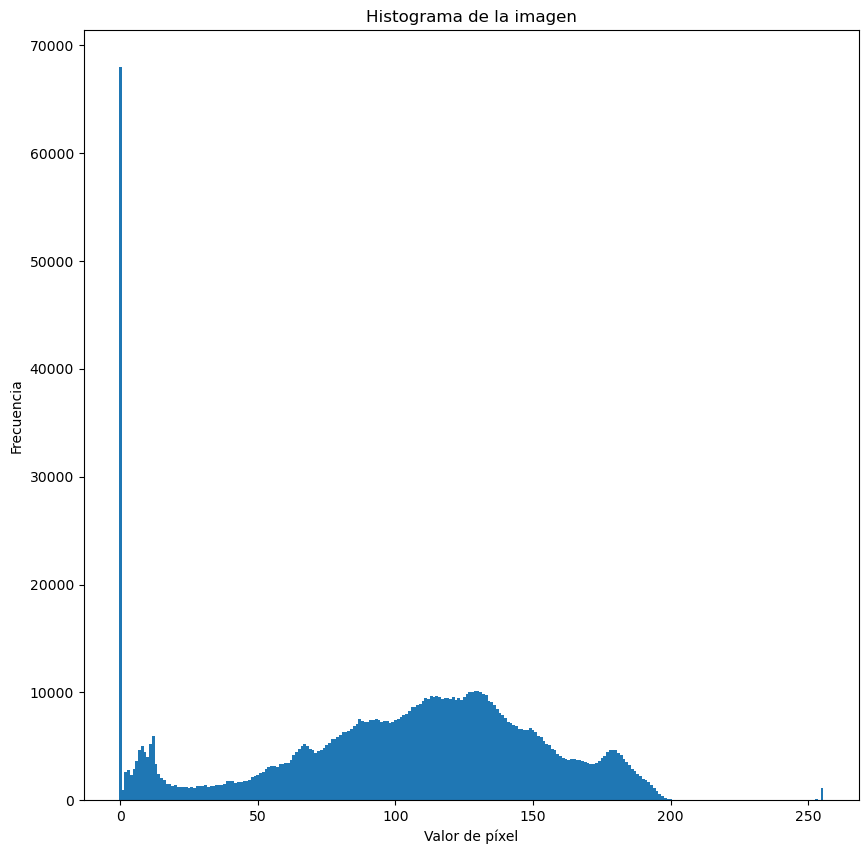

In [49]:
#Generar histograma de imagenes
ruta='/home/deadwolf/Descargas/Nodule/00023068_003.png'
imagen = sk.io.imread(ruta)
histograma, bins = np.histogram(imagen.flatten(), bins=256, range=(0,256))
plt.figure(figsize=(10, 10))
plt.bar(bins[:-1], histograma, width=1)
plt.title('Histograma de la imagen')
plt.xlabel('Valor de píxel')
plt.ylabel('Frecuencia')
plt.grid(False)
plt.savefig('histo.png', bbox_inches='tight')
plt.show()